# DTDC Shipment Data Analysis: Optimizing Logistics & Revenue

Project Type - EDA

Contribution - Individual

## Main Goal
We want to make our courier operations **more efficient** and **more profitable** by better understanding how our shipments, pricing, and customers work.

---

## Objectives & Questions to Answer

### 1. Revenue and Pricing 💰
We need to know how we earn money and whether our pricing makes sense.

#### Most Profitable Routes
Which origin–destination city pairs bring in the most money? Show the top 10.

#### Weight vs Price
Does the cost we charge go up fairly with the weight of the shipment?

#### Payment Methods
Which payment method is used most often? Does it change for different cities or price ranges?

---
### 2. Operations and Logistics 🚚
We want to improve speed and reduce costs in our delivery network.

#### Busiest Routes
Which city pairs have the most shipments? Show the top 10.

#### Typical Weight
What is the most common shipment weight?

#### Consignment Type
What percentage of shipments are documents vs non-documents? Are certain routes used more for documents?

---

### 3. Customer and Market Insights 📈
We want to understand our customers and what they send.

#### Hotspot Areas
Which pincodes or areas send and receive the most shipments?

#### Business vs Individual Customers
How many shipments are going to companies vs individuals? Are company shipments worth more?

---

## Final Output
Your analysis should include:
- Clear charts and graphs for each question.
- A short summary of findings for the business team.
- Insights we can use for our **next quarterly review** to make better decisions on routes, pricing, and marketing.


## 1. Dataset Overview

### 1.1 Libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1.2 Dataset Loading

In [2]:
df=pd.read_csv(r'C:/Users/USER/OneDrive/Desktop/DATA ANALYTICS PROJECT/EDA PROJECT1/Dataset_Generator_for_DTDC (1).csv')

### 1.3 Dataset First view

In [4]:
df.head()

,Origin,Destination,Pouch No,Date,Sender's Name,Sender Phone,Sender Address,Sender City,Sender State,Sender Pincode,...,Company Stamp,Receiver Signature,Receive Date,Tariff,VAS Charges,Total Amount,Mode,Risk Surcharge,Mode of Payment,Nature of Consignment
0,Nagpur,Jamshedpur,55e275ad-8da9-49c9-986c-93134fef2c19,2025-06-25,Megha Majumdar,6137840452,"H.No. 425 Varughese Chowk, Above Shop, Nagpur,...",Nagpur,Maharashtra,264582,...,NaN,NaN,2025-06-30,147.22,70.09,217.31,Express,Carrier,Cash,Dox
1,Jaipur,Vizag,7fab4175-11b2-4090-a0ed-4571ccd68878,2025-06-27,Nanda-Saraf,52907142,"48/880, Tripathi, Above Shop, Jaipur, Rajastha...",Jaipur,Rajasthan,200155,...,NaN,NaN,2025-06-28,256.83,82.20,339.03,Surface,Carrier,Card,Dox
2,Lucknow,Bhubaneswar,5231428d-b524-433e-8043-45c7e39a94aa,2025-06-27,Contractor LLC,5081512738,"257, Kulkarni Path, Above Shop, Lucknow, Uttar...",Lucknow,Uttar Pradesh,353311,...,NaN,NaN,2025-06-28,432.45,107.63,540.08,Surface,Carrier,Cash,Non-Dox
3,Coimbatore,Mumbai,2f556b38-298d-4e8c-9310-4e6a3a5fbe61,2025-06-11,Krishna Hans,1518559754,"83/17 Sridhar Zila, Above Shop, Coimbatore, Ta...",Coimbatore,Tamil Nadu,553663,...,NaN,NaN,2025-06-15,1162.00,25.23,1187.23,Express,Carrier,Card,Non-Dox
4,Meerut,Vijayawada,c3154041-34eb-435e-94d8-0900e6a9ed01,2025-07-01,Kuruvilla-Tiwari,1666398391,"16/64 Jayaraman Circle, Above Shop, Meerut, Ut...",Meerut,Uttar Pradesh,273143,...,NaN,NaN,2025-07-05,285.55,67.70,353.25,Surface,Carrier,Cash,Dox


In [5]:
df.tail()

,Origin,Destination,Pouch No,Date,Sender's Name,Sender Phone,Sender Address,Sender City,Sender State,Sender Pincode,...,Company Stamp,Receiver Signature,Receive Date,Tariff,VAS Charges,Total Amount,Mode,Risk Surcharge,Mode of Payment,Nature of Consignment
49634,Varanasi,Bhopal,78ad9246-96ca-40e0-a77e-1f5f601b2114,2025-07-04,Chavvi Kashyap,6657295176,"H.No. 66, Chaudry Marg, Behind School, Varanas...",Varanasi,Uttar Pradesh,864652,...,NaN,NaN,2025-07-05,485.50,31.14,516.64,Surface,Carrier,Card,Non-Dox
49635,Patna,Jamshedpur,be889bde-61ea-460c-8dc8-6bdaf7a91579,2025-06-15,"Chakrabarti, Pandit and Agrawal",5273847382,"62 Palla, Opposite Mall, Patna, Bihar - 114677",Patna,Bihar,114677,...,NaN,NaN,2025-06-18,451.46,124.68,576.14,Surface,Carrier,Cash,Dox
49636,Kolkata,Aurangabad,17a77c5d-ccdf-42c1-adc0-ec5b89b84154,2025-06-06,Arya Shere,4416278858,"H.No. 959, Shetty Ganj, Opposite Mall, Kolkata...",Kolkata,West Bengal,19999,...,NaN,NaN,2025-06-08,458.24,63.33,521.57,Surface,Carrier,Cash,Dox
49637,Srinagar,Aurangabad,9eae5dad-b5c0-4047-b1fe-a340dbc4e41e,2025-07-05,Harita Dhaliwal,5568995605,"960, Saini Street, Behind School, Srinagar, Ja...",Srinagar,Jammu & Kashmir,138785,...,Yes,Yes,2025-07-10,515.65,0.00,515.65,Air Cargo,Carrier,Wallet,Non-Dox
49638,Ahmedabad,Amritsar,fe45d57f-d3ab-4c39-b60a-8abebae5c224,2025-06-24,Warhi Nath,2408553775,"13, Manne Ganj, Behind School, Ahmedabad, Guja...",Ahmedabad,Gujarat,587107,...,NaN,NaN,2025-06-29,453.02,106.62,559.64,Surface,Carrier,Card,Dox


### 1.4 Dataset information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Origin                 49639 non-null  object 
 1   Destination            49639 non-null  object 
 2   Pouch No               49639 non-null  object 
 3   Date                   49639 non-null  object 
 4   Sender's Name          49639 non-null  object 
 5   Sender Phone           49639 non-null  int64  
 6   Sender Address         49639 non-null  object 
 7   Sender City            49639 non-null  object 
 8   Sender State           49639 non-null  object 
 9   Sender Pincode         49639 non-null  int64  
 10  Sender GSTIN           26778 non-null  object 
 11  Total Pieces           49639 non-null  int64  
 12  Actual Wt              49639 non-null  float64
 13  Volumetric Wt          49639 non-null  float64
 14  Chargeable Wt          49639 non-null  float64
 15  Pa

### 1.5 Dataset Shape

In [10]:
print('The number of rows and columns in dataset:', df.shape)

The number of rows and columns in dataset: (49639, 42)


### 1.6 Missing Values

In [4]:
print("Missing values in dataset")
df.isnull().sum()

Missing values in dataset


Origin                       0
Destination                  0
Pouch No                     0
Date                         0
Sender's Name                0
Sender Phone                 0
Sender Address               0
Sender City                  0
Sender State                 0
Sender Pincode               0
Sender GSTIN             22861
Total Pieces                 0
Actual Wt                    0
Volumetric Wt                0
Chargeable Wt                0
Paperwork                    0
Sender Signature         19828
Sender Date                  0
Recipient Name               0
Recipient Phone              0
Recipient Address            0
Recipient City               0
Receiver State               0
Receiver Pincode             0
Description                  0
Value Added Services     10240
Consignment No               0
Expiry Date                  0
Booking Code                 0
Recipient GSTIN          35773
Receiver Name                0
Relationship                 0
Company 

#### Missing Values Overview

Missing values mean some information is not filled in the dataset. This can happen because it was not given, there was an error, or it was not needed for that record. If many values are missing in a column, we may need to fill them or remove the column to keep our analysis correct.


Text(95.72222222222221, 0.5, 'Rows')

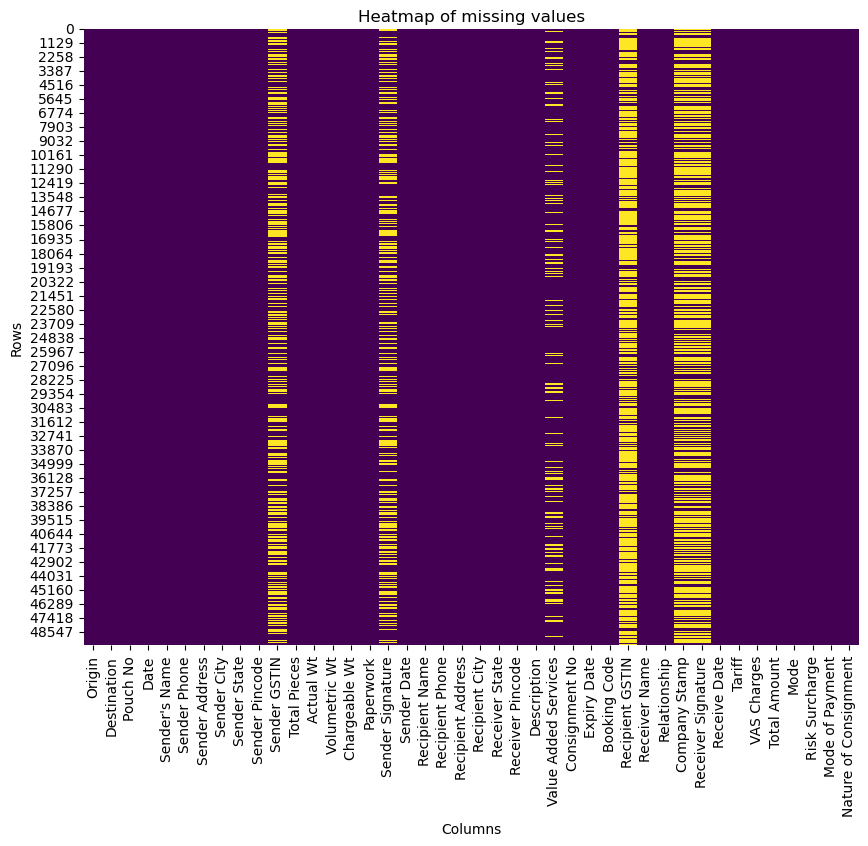

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),
            cbar=False,
            cmap='viridis')
plt.title('Heatmap of missing values')
plt.xlabel('Columns')
plt.ylabel('Rows')

### Missing Values Heatmap
A missing values heatmap is a visual tool used to quickly identify and understand the pattern of missing data within a dataset. Each cell in the heatmap represents a data point, with colors indicating whether the value is present or missing.

#### Purpose:
To detect which columns or rows have missing values, and whether those missing values occur randomly or follow some pattern.

#### How to read:

Colored cells (usually bright or distinct color) show missing values.

Dark or neutral-colored cells indicate non-missing (present) values.

#### Why useful:

Helps in deciding how to handle missing data: imputation, removal, or ignoring.

Reveals if missingness is concentrated in certain features or spread throughout.

Guides data cleaning and preprocessing steps.

### 1.7 Duplicate Values

In [6]:
# Show all rows that have duplicates in df
duplicate_rows = df[df.duplicated(keep=False)]

# Display the result
duplicate_rows


,Origin,Destination,Pouch No,Date,Sender's Name,Sender Phone,Sender Address,Sender City,Sender State,Sender Pincode,...,Company Stamp,Receiver Signature,Receive Date,Tariff,VAS Charges,Total Amount,Mode,Risk Surcharge,Mode of Payment,Nature of Consignment


In [7]:
df.duplicated(keep=False).sum()


0

### Duplicate Rows Check — Simple Explanation
A duplicate row means every value in the row is exactly the same as another row in the dataset.

When we checked for duplicates, the result showed 0 rows, which means:

No two rows in the dataset are completely identical.

Every row is unique when looking at all 42 columns together.

There’s no need to remove full-row duplicates.

## 2. Understanding Dataset Variable

In [8]:
print("The columns in dataframe are -->")
df.columns

The columns in dataframe are -->


Index(['Origin', 'Destination', 'Pouch No', 'Date', 'Sender's Name',
       'Sender Phone', 'Sender Address', 'Sender City', 'Sender State',
       'Sender Pincode', 'Sender GSTIN', 'Total Pieces', 'Actual Wt',
       'Volumetric Wt', 'Chargeable Wt', 'Paperwork', 'Sender Signature',
       'Sender Date', 'Recipient Name', 'Recipient Phone', 'Recipient Address',
       'Recipient City', 'Receiver State', 'Receiver Pincode', 'Description',
       'Value Added Services', 'Consignment No', 'Expiry Date', 'Booking Code',
       'Recipient GSTIN', 'Receiver Name', 'Relationship', 'Company Stamp',
       'Receiver Signature', 'Receive Date', 'Tariff', 'VAS Charges',
       'Total Amount', 'Mode', 'Risk Surcharge', 'Mode of Payment',
       'Nature of Consignment'],
      dtype='object')


 ### Show summary stats for all numeric columns in titles data


In [9]:
df.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
Sender Phone,49639.0,5.010054e+09,2.892645e+09,17108.00,2.479984e+09,5.018929e+09,7.533459e+09,9.999872e+09
Sender Pincode,49639.0,4.997865e+05,2.886076e+05,1.00,2.481975e+05,4.994790e+05,7.483220e+05,9.999810e+05
Total Pieces,49639.0,2.994480e+00,1.415086e+00,1.00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Actual Wt,49639.0,6.167263e+00,3.375089e+00,0.30,3.260000e+00,6.190000e+00,9.080000e+00,1.200000e+01
Volumetric Wt,49639.0,7.716568e+00,3.476748e+00,0.44,4.800000e+00,7.740000e+00,1.064000e+01,1.497000e+01
Chargeable Wt,49639.0,7.716568e+00,3.476748e+00,0.44,4.800000e+00,7.740000e+00,1.064000e+01,1.497000e+01
Recipient Phone,49639.0,4.973767e+09,2.883664e+09,228920.00,2.473943e+09,4.960678e+09,7.459426e+09,9.999958e+09
Receiver Pincode,49639.0,5.005479e+05,2.878514e+05,2.00,2.520650e+05,5.023200e+05,7.492295e+05,9.999730e+05
Tariff,49639.0,4.408541e+02,2.431882e+02,19.90,2.550400e+02,4.099800e+02,5.715700e+02,1.372900e+03
VAS Charges,49639.0,6.719894e+01,4.789943e+01,0.00,2.730500e+01,6.745000e+01,1.088600e+02,1.500000e+02



### 1. Phone numbers & pincodes are treated as numbers
Sender Phone and Recipient Phone are shown in scientific notation (e.g., 5.010054e+09 = 5,010,054,000).

This means pandas thinks they are numeric, but phone numbers should be stored as strings to avoid losing formatting (like leading zeros).

Sender Pincode and Receiver Pincode also appear as numbers.

Min values are extremely small (1.00 and 2.00), which suggests some incorrect or missing pincodes.

### 2. Parcel details
Total Pieces → Most shipments have 3 items on average (median = 3), ranging from 1 to 5.

Actual Wt, Volumetric Wt, Chargeable Wt →

Average weight ~7.7 kg chargeable (based on volumetric calculation).

Minimum weight ~0.44 kg, max ~15 kg.

### 3. Charges
Tariff → Average base price ~₹441, ranging from ₹19.90 to ₹1,372.90.

VAS Charges → Average ~₹67, sometimes 0 (no extra services), max ₹150.

Total Amount → Average ~₹508, with the highest recorded total ~₹1,481.

In [10]:
df['Sender Phone'] = df['Sender Phone'].astype(str)
df['Sender Pincode'] = df['Sender Pincode'].astype(str)
df.dtypes


Origin                    object
Destination               object
Pouch No                  object
Date                      object
Sender's Name             object
Sender Phone              object
Sender Address            object
Sender City               object
Sender State              object
Sender Pincode            object
Sender GSTIN              object
Total Pieces               int64
Actual Wt                float64
Volumetric Wt            float64
Chargeable Wt            float64
Paperwork                 object
Sender Signature          object
Sender Date               object
Recipient Name            object
Recipient Phone            int64
Recipient Address         object
Recipient City            object
Receiver State            object
Receiver Pincode           int64
Description               object
Value Added Services      object
Consignment No            object
Expiry Date               object
Booking Code              object
Recipient GSTIN           object
Receiver N

In [11]:
df.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
Total Pieces,49639.0,2.994480e+00,1.415086e+00,1.00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Actual Wt,49639.0,6.167263e+00,3.375089e+00,0.30,3.260000e+00,6.190000e+00,9.080000e+00,1.200000e+01
Volumetric Wt,49639.0,7.716568e+00,3.476748e+00,0.44,4.800000e+00,7.740000e+00,1.064000e+01,1.497000e+01
Chargeable Wt,49639.0,7.716568e+00,3.476748e+00,0.44,4.800000e+00,7.740000e+00,1.064000e+01,1.497000e+01
Recipient Phone,49639.0,4.973767e+09,2.883664e+09,228920.00,2.473943e+09,4.960678e+09,7.459426e+09,9.999958e+09
Receiver Pincode,49639.0,5.005479e+05,2.878514e+05,2.00,2.520650e+05,5.023200e+05,7.492295e+05,9.999730e+05
Tariff,49639.0,4.408541e+02,2.431882e+02,19.90,2.550400e+02,4.099800e+02,5.715700e+02,1.372900e+03
VAS Charges,49639.0,6.719894e+01,4.789943e+01,0.00,2.730500e+01,6.745000e+01,1.088600e+02,1.500000e+02
Total Amount,49639.0,5.080530e+02,2.480972e+02,22.63,3.203950e+02,4.776400e+02,6.448050e+02,1.481160e+03



## 2.1 Variables Description
This dataset contains courier shipment records with 42 columns containing details about the sender, receiver, package, and charges:

Origin – Origin location of the shipment.

Destination – Destination location of the shipment.

Pouch No – Unique pouch/bag number assigned to the shipment.

Date – Date of booking or dispatch.

Sender's Name – Name of the sender.

Sender Phone – Phone number of the sender.

Sender Address – Address of the sender.

Sender City – City of the sender.

Sender State – State of the sender.

Sender Pincode – Postal code of the sender's location.

Sender GSTIN – GST Identification Number of the sender (if applicable).

Total Pieces – Total number of pieces in the shipment.

Actual Wt – Actual weight of the shipment.

Volumetric Wt – Calculated volumetric weight of the shipment.

Chargeable Wt – Weight used for calculating charges (whichever is higher between actual and volumetric).

Paperwork – Indicates paperwork status for the shipment.

Sender Signature – Signature of the sender.

Sender Date – Date on which sender signed/handed over the parcel.

Recipient Name – Name of the receiver.

Recipient Phone – Phone number of the receiver.

Recipient Address – Address of the receiver.

Recipient City – City of the receiver.

Receiver State – State of the receiver.

Receiver Pincode – Postal code of the receiver's location.

Description – Short description of the shipment contents.

Value Added Services – Any extra services applied (e.g., insurance, priority).

Consignment No – Unique tracking/consignment number.

Expiry Date – Expiry date for any related service or offer.

Booking Code – Internal booking reference code.

Recipient GSTIN – GST Identification Number of the recipient (if applicable).

Receiver Name – Name of the receiving person.

Relationship – Relationship of the receiving person to the recipient.

Company Stamp – Stamp of the company receiving the parcel.

Receiver Signature – Signature of the receiver.

Receive Date – Date the parcel was received.

Tariff – Tariff rate applicable for the shipment.

VAS Charges – Value-added service charges.

Total Amount – Total amount charged for the shipment.

Mode – Mode of transport used (e.g., air, surface).

Risk Surcharge – Surcharge applied for high-risk shipments.

Mode of Payment – Payment mode (e.g., cash, card, online).

Nature of Consignment – Type/category of the shipment (e.g., documents, goods).


In [12]:
df.nunique()


Origin                      36
Destination                 36
Pouch No                 49639
Date                        30
Sender's Name            41841
Sender Phone             49639
Sender Address           49639
Sender City                 36
Sender State                22
Sender Pincode           48435
Sender GSTIN             26778
Total Pieces                 5
Actual Wt                 1171
Volumetric Wt             1446
Chargeable Wt             1446
Paperwork                    2
Sender Signature             1
Sender Date                 30
Recipient Name           44266
Recipient Phone          49639
Recipient Address        49639
Recipient City              36
Receiver State              22
Receiver Pincode         48396
Description              48468
Value Added Services         3
Consignment No           49629
Expiry Date                 30
Booking Code              1000
Recipient GSTIN          13866
Receiver Name            44266
Relationship                 4
Company 

In [13]:

# 1. Check uniqueness percentage for each column
unique_percentage = df.nunique() / len(df) * 100
unique_df = pd.DataFrame({
    "Unique_Count": df.nunique(),
    "Total_Rows": len(df),
    "Unique_Percentage": unique_percentage
}).sort_values(by="Unique_Percentage", ascending=False)

print("---- Unique Value Analysis ----")
print(unique_df)


---- Unique Value Analysis ----
                       Unique_Count  Total_Rows  Unique_Percentage
Pouch No                      49639       49639         100.000000
Recipient Address             49639       49639         100.000000
Recipient Phone               49639       49639         100.000000
Sender Phone                  49639       49639         100.000000
Sender Address                49639       49639         100.000000
Consignment No                49629       49639          99.979855
Description                   48468       49639          97.640968
Sender Pincode                48435       49639          97.574488
Receiver Pincode              48396       49639          97.495921
Recipient Name                44266       49639          89.175850
Receiver Name                 44266       49639          89.175850
Sender's Name                 41841       49639          84.290578
Total Amount                  37623       49639          75.793227
Tariff                        

## 3. Handeling Missing Values

In [14]:
# Calculate percentage of missing values in each column of data
(df.isnull().sum()/len(df))*100

Origin                    0.000000
Destination               0.000000
Pouch No                  0.000000
Date                      0.000000
Sender's Name             0.000000
Sender Phone              0.000000
Sender Address            0.000000
Sender City               0.000000
Sender State              0.000000
Sender Pincode            0.000000
Sender GSTIN             46.054514
Total Pieces              0.000000
Actual Wt                 0.000000
Volumetric Wt             0.000000
Chargeable Wt             0.000000
Paperwork                 0.000000
Sender Signature         39.944399
Sender Date               0.000000
Recipient Name            0.000000
Recipient Phone           0.000000
Recipient Address         0.000000
Recipient City            0.000000
Receiver State            0.000000
Receiver Pincode          0.000000
Description               0.000000
Value Added Services     20.628941
Consignment No            0.000000
Expiry Date               0.000000
Booking Code        

#### Selecting Only numarical columns because to fill the missing values

In [15]:
numarical_columns=df.select_dtypes(include=['number'])
numarical_columns

,Total Pieces,Actual Wt,Volumetric Wt,Chargeable Wt,Recipient Phone,Receiver Pincode,Tariff,VAS Charges,Total Amount
0,5,1.45,1.90,1.90,1404091893,950721,147.22,70.09,217.31
1,5,5.94,6.12,6.12,5538585979,150138,256.83,82.20,339.03
2,3,7.46,9.71,9.71,2173257324,930670,432.45,107.63,540.08
3,4,11.81,14.44,14.44,786556887,479840,1162.00,25.23,1187.23
4,3,5.97,6.72,6.72,6906703769,670910,285.55,67.70,353.25
...,...,...,...,...,...,...,...,...,...
49634,5,9.54,11.31,11.31,1978250798,469837,485.50,31.14,516.64
49635,1,8.47,9.95,9.95,4224282853,117951,451.46,124.68,576.14
49636,5,7.75,10.08,10.08,9983707485,301770,458.24,63.33,521.57
49637,4,6.84,8.49,8.49,7473499986,862940,515.65,0.00,515.65


#### In above we can see numarical columns.but some columns are cant fill with mean or median or mode (Sender Phone,Sender Pincode,Recipient Phone,Receiver Pincode)


In [16]:

# Drop columns which columns have morethan 50% of duplicates
df.drop(['Recipient GSTIN','Company Stamp','Receiver Signature'], axis=1, inplace=True)

In [17]:
df.drop(['Sender GSTIN','Sender Signature','Value Added Services'],axis=1, inplace=True)

In [37]:
(df.isnull().sum()/len(df))*100

Origin                   0.0
Destination              0.0
Pouch No                 0.0
Date                     0.0
Sender's Name            0.0
Sender Phone             0.0
Sender Address           0.0
Sender City              0.0
Sender State             0.0
Sender Pincode           0.0
Total Pieces             0.0
Actual Wt                0.0
Volumetric Wt            0.0
Chargeable Wt            0.0
Paperwork                0.0
Sender Date              0.0
Recipient Name           0.0
Recipient Phone          0.0
Recipient Address        0.0
Recipient City           0.0
Receiver State           0.0
Receiver Pincode         0.0
Description              0.0
Consignment No           0.0
Expiry Date              0.0
Booking Code             0.0
Receiver Name            0.0
Relationship             0.0
Receive Date             0.0
Tariff                   0.0
VAS Charges              0.0
Total Amount             0.0
Mode                     0.0
Risk Surcharge           0.0
Mode of Paymen

#### Now we can Absorve There is no columns with missing value 

### now we can check the missing values with the heatmap

Text(50.722222222222214, 0.5, 'rows')

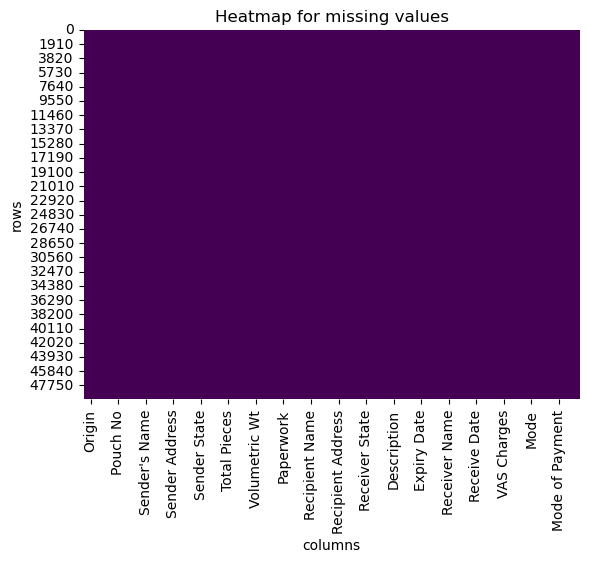

In [19]:
plt.Figure(figsize=(20,10))
sns.heatmap(df.isnull(),
            cbar=False,
            cmap='viridis')
plt.title('Heatmap for missing values')
plt.xlabel('columns')
plt.ylabel('rows')

## 4. Handling Duplicates

In [20]:

# Find all duplicate rows in titles data
duplicates_on_titles = df[df.duplicated(keep=False)]

# Print number of duplicate rows
print(len(duplicates_on_titles))

# Show the duplicate rows
duplicates_on_titles

0


,Origin,Destination,Pouch No,Date,Sender's Name,Sender Phone,Sender Address,Sender City,Sender State,Sender Pincode,...,Receiver Name,Relationship,Receive Date,Tariff,VAS Charges,Total Amount,Mode,Risk Surcharge,Mode of Payment,Nature of Consignment


#### we dont have any duplicates in dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Origin                 49639 non-null  object 
 1   Destination            49639 non-null  object 
 2   Pouch No               49639 non-null  object 
 3   Date                   49639 non-null  object 
 4   Sender's Name          49639 non-null  object 
 5   Sender Phone           49639 non-null  object 
 6   Sender Address         49639 non-null  object 
 7   Sender City            49639 non-null  object 
 8   Sender State           49639 non-null  object 
 9   Sender Pincode         49639 non-null  object 
 10  Total Pieces           49639 non-null  int64  
 11  Actual Wt              49639 non-null  float64
 12  Volumetric Wt          49639 non-null  float64
 13  Chargeable Wt          49639 non-null  float64
 14  Paperwork              49639 non-null  object 
 15  Se

In [22]:
# Convert Dates to datetime
date_cols = ["Date", "Sender Date", "Expiry Date", "Receive Date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Origin                 49639 non-null  object        
 1   Destination            49639 non-null  object        
 2   Pouch No               49639 non-null  object        
 3   Date                   49639 non-null  datetime64[ns]
 4   Sender's Name          49639 non-null  object        
 5   Sender Phone           49639 non-null  object        
 6   Sender Address         49639 non-null  object        
 7   Sender City            49639 non-null  object        
 8   Sender State           49639 non-null  object        
 9   Sender Pincode         49639 non-null  object        
 10  Total Pieces           49639 non-null  int64         
 11  Actual Wt              49639 non-null  float64       
 12  Volumetric Wt          49639 non-null  float64       
 13  C

# 5. Visualisation

## Revenue and Pricing

### 1. Most Profitable Routes

#### We’ll combine Origin and Destination to make a Route column, then plot the Top 10 by Total Revenue.

In [36]:
# Create route column
df['Route'] = df['Origin'] + " → " + df['Destination']
# Top 10 routes by revenue
top_routes = df.groupby('Route')['Total Amount'].sum().sort_values(ascending=False).head(10)
top_routes

Route
Srinagar → Kochi          35758.81
Jamshedpur → Hyderabad    31417.05
Ahmedabad → Aurangabad    31384.16
Chandigarh → Varanasi     29841.67
Bangalore → Amritsar      29615.61
Pune → Bangalore          29348.54
Patna → Shimla            29031.90
Raipur → Agra             28981.91
Aurangabad → Pune         28960.21
Nagpur → Guwahati         28815.59
Name: Total Amount, dtype: float64

This code finds the **top 10 most profitable routes** by calculating the total revenue for each route.

* First, it groups all shipments by their **Route**.
* Then, it **adds up the revenue** (`Total Amount`) for each route.
* After that, it **sorts the routes** from highest to lowest revenue.
* Finally, it picks the **top 10 routes** that bring in the most money.


C:\Users\USER\AppData\Local\Temp\ipykernel_37128\3711269451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette='Blues_r')


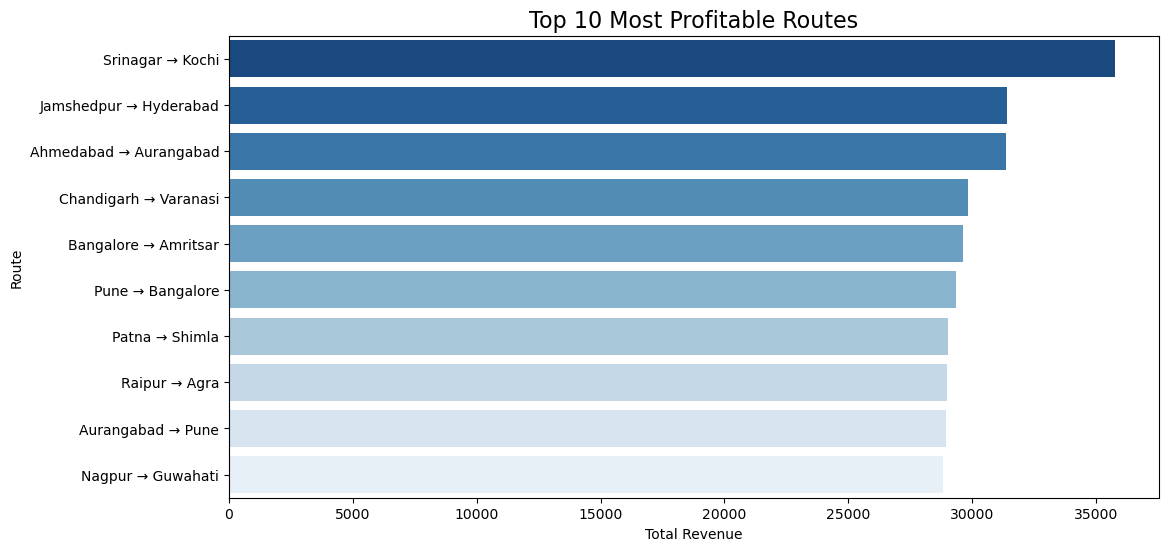

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette='Blues_r')
plt.title('Top 10 Most Profitable Routes', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Route')
plt.show()

#### 1. Why did you pick the specific chart?
I chose a horizontal bar chart because the route names are long, and this layout makes them easier to read without overlapping. It also clearly shows the difference in revenue for each route.

#### 2. What is/are the insight(s) found from the chart?
The chart shows that Srinagar → Kochi is the most profitable route, followed by Jamshedpur → Hyderabad and Ahmedabad → Aurangabad. The revenue gradually decreases for the other routes in the top 10.

#### 3. Will the gained insights help create a positive business impact?
Yes. By focusing on the highest-revenue routes, the company can invest more in these areas to maintain quality service and possibly expand operations. For lower-revenue routes, the company can explore ways to improve profitability, such as optimizing costs or increasing shipments.

### 2. Weight vs Price Relationship

#### We’ll check if Chargeable Wt correlates with Total Amount.

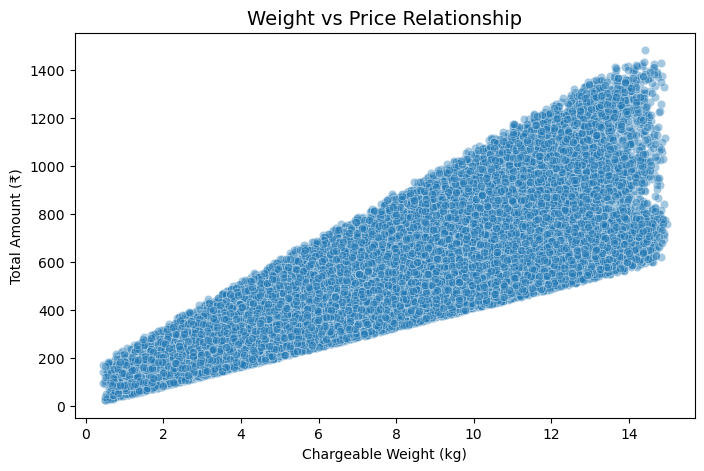

Correlation between weight and price: 0.81


In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Chargeable Wt', y='Total Amount', data=df, alpha=0.4)
plt.title('Weight vs Price Relationship', fontsize=14)
plt.xlabel('Chargeable Weight (kg)')
plt.ylabel('Total Amount (₹)')
plt.show()

# Correlation value
corr_value = df['Chargeable Wt'].corr(df['Total Amount'])
print(f"Correlation between weight and price: {corr_value:.2f}")


### Weight vs Price Scatter Plot Analysis

#### 1. Why did you pick the specific chart?  
To understand how the shipment price changes with the weight and identify any patterns or anomalies in pricing.

#### 2. What is/are the insight(s) found from the chart?  
- Price generally increases with weight.  
- For the same weight, prices can vary due to distance, service type, or other factors.  
- Higher weight shipments show more variation in price; low-weight shipments are priced more consistently.

#### 3. Will the gained insights help create a positive business impact?  
Yes — it can help verify pricing consistency, detect errors or special deals, and optimize the pricing strategy for better profitability.

### Correlation between Weight and Price

The correlation between Chargeable Weight and Total Amount is **0.81**, which indicates a **strong positive relationship**. This means that, in general, as the weight of a shipment increases, the price charged also increases. 

A correlation value close to 1 shows that the weight is an important factor in determining the shipment price, though some variation may still exist due to other factors such as distance, service type, or discounts.

### 3. Payment Method Usage

#### We’ll visualize count of shipments by payment type and also total revenue per payment type.

C:\Users\USER\AppData\Local\Temp\ipykernel_37128\3844622442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Mode of Payment', palette='Set2', order=df['Mode of Payment'].value_counts().index)


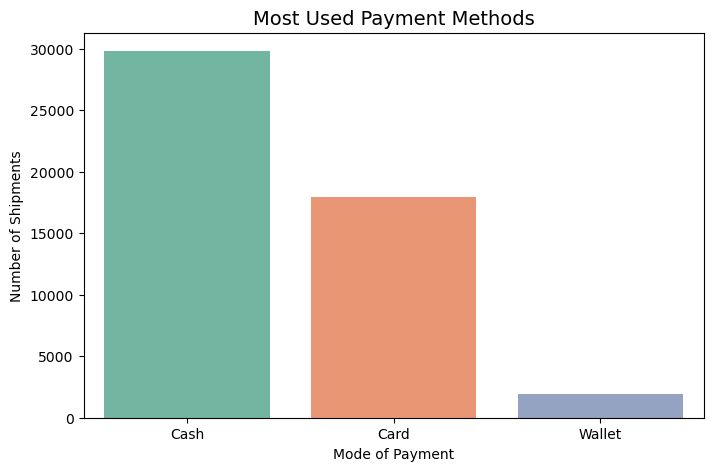

In [42]:
# Payment method count
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Mode of Payment', palette='Set2', order=df['Mode of Payment'].value_counts().index)
plt.title('Most Used Payment Methods', fontsize=14)
plt.xlabel('Mode of Payment')
plt.ylabel('Number of Shipments')
plt.show()

### 1. Why did you pick the specific chart?
To visualize which payment methods customers use most frequently and identify trends in payment preferences.

### 2. What is/are the insight(s) found from the chart?
- Cash is the most commonly used payment method.  
- Card is the second most used option.  
- Wallets are rarely used compared to cash or card.

### 3. Will the gained insights help create a positive business impact?
Yes — understanding customer payment preferences can help:
- Optimize payment options  
- Reduce transaction issues  
- Design targeted promotions for less-used payment methods like wallets


C:\Users\USER\AppData\Local\Temp\ipykernel_37128\2696039148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_revenue.index, y=payment_revenue.values, palette='viridis')


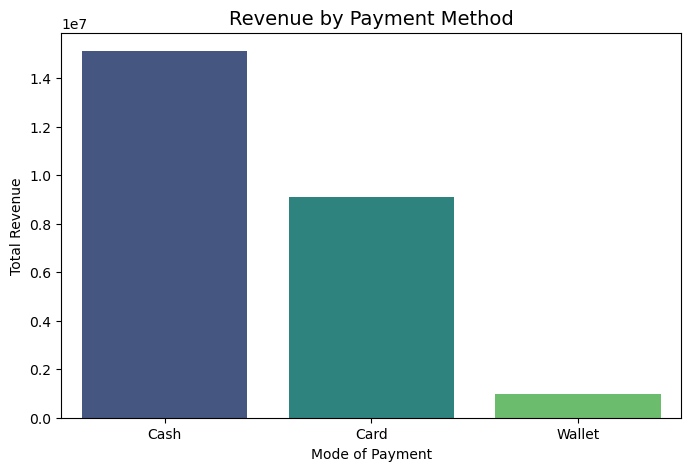

In [45]:
# Payment method revenue
payment_revenue = df.groupby('Mode of Payment')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=payment_revenue.index, y=payment_revenue.values, palette='viridis')
plt.title('Revenue by Payment Method', fontsize=14)
plt.ylabel('Total Revenue')
plt.show()

### 1. Why did you pick the specific chart?
The bar chart was chosen to visualize which payment methods generate the most revenue, making it easy to compare customer preferences at a glance.

### 2. What is/are the insight(s) found from the chart?
- **Cash** generates the highest revenue among all payment methods.  
- **Card** comes second in terms of revenue.  
- **Wallets** contribute the least revenue compared to cash and card.

### 3. Will the gained insights help create a positive business impact?
Yes — understanding the revenue contribution of different payment methods can help:
- Focus on optimizing cash and card transactions for better efficiency.  
- Encourage usage of wallets through promotions to balance payment options.  
- Reduce potential issues in underperforming payment channels.


 ### The chart shows that the revenue from **cash payments** is significantly higher than the revenue from **card** or **wallet payments**.

The **y-axis** is scaled in units of 10⁷. Let's re-examine the approximate revenue values:

- **Cash:** The bar for cash is just below the 1.5 mark on the y-axis, which corresponds to approximately **1.48 × 10⁷** (14.8 million).  
- **Card:** The bar for card is at approximately the 0.925 mark on the y-axis, which corresponds to approximately **0.925 × 10⁷** (9.25 million).  
- **Wallet:** The bar for wallet is at approximately the 0.1 mark on the y-axis, which corresponds to approximately **0.1 × 10⁷** (1 million).  

The chart is a visual representation of the data, and the difference in the height of the bars directly reflects the difference in revenue generated by each payment method.


### 4. Payment Method by City

#### We can see if some cities prefer certain payment types.

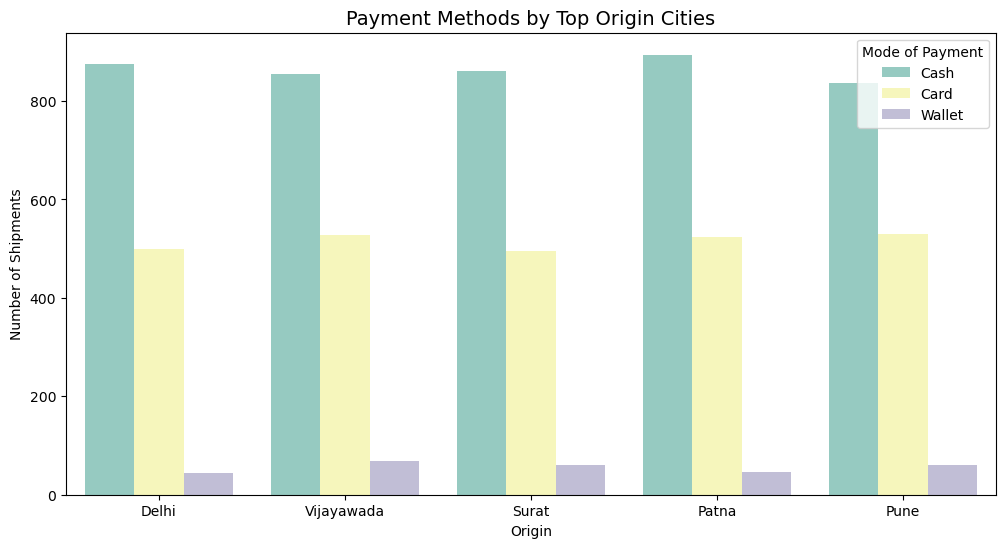

In [59]:
top_cities = df['Origin'].value_counts().head(5).index
city_payment = df[df['Origin'].isin(top_cities)]

plt.figure(figsize=(12,6))
sns.countplot(data=city_payment, x='Origin', hue='Mode of Payment', palette='Set3')
plt.title('Payment Methods by Top Origin Cities', fontsize=14)
plt.ylabel('Number of Shipments')
plt.show()


### 1. Why did you pick the specific chart?  
The **grouped bar chart** was chosen to effectively visualize the number of shipments for different payment methods across the top five origin cities. It allows for a **direct comparison of payment preferences** within each city and across all cities at a glance.

### 2. Insights Found from the Chart  

The chart reveals several key insights:

- **Cash is King:** Across all top five cities—Delhi, Vijayawada, Surat, Patna, and Pune—cash is the most dominant mode of payment, consistently accounting for the highest number of shipments.  
- **Card is Second:** Card payments are the second most preferred method, though they are used significantly less than cash in every city.  
- **Wallet is Least Popular:** Wallets are the least-used payment method in all five cities, with a very low number of shipments compared to cash and card.  
- **Consistent Pattern:** The overall preference for payment methods follows a consistent pattern across all cities: **Cash > Card > Wallet**. The relative proportions of each payment method remain similar from city to city.

### 3. Positive Business Impact  

Yes, these insights can help create a **positive business impact**:

- **Operational Efficiency:** Knowing that cash payments are the most frequent, a business can focus on optimizing cash handling processes—such as ensuring sufficient change, streamlining collection, and improving security measures.  
- **Targeted Promotions:** The data shows a low adoption rate for wallets. Targeted marketing campaigns and promotions in these top cities could encourage wallet usage, leading to **faster, more secure transactions** and potentially reducing cash-handling costs.  
- **Strategic Planning:** The consistent dominance of cash across different major cities suggests that any strategic business decision—such as expanding into a new city—should account for a **high volume of cash transactions**.


# 2. Operations and Logistics 🚚

## 1. Busiest Routes (Top 10 by Number of Shipments)

C:\Users\USER\AppData\Local\Temp\ipykernel_37128\1912384582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_busiest_routes.values, y=top_busiest_routes.index, palette='coolwarm')


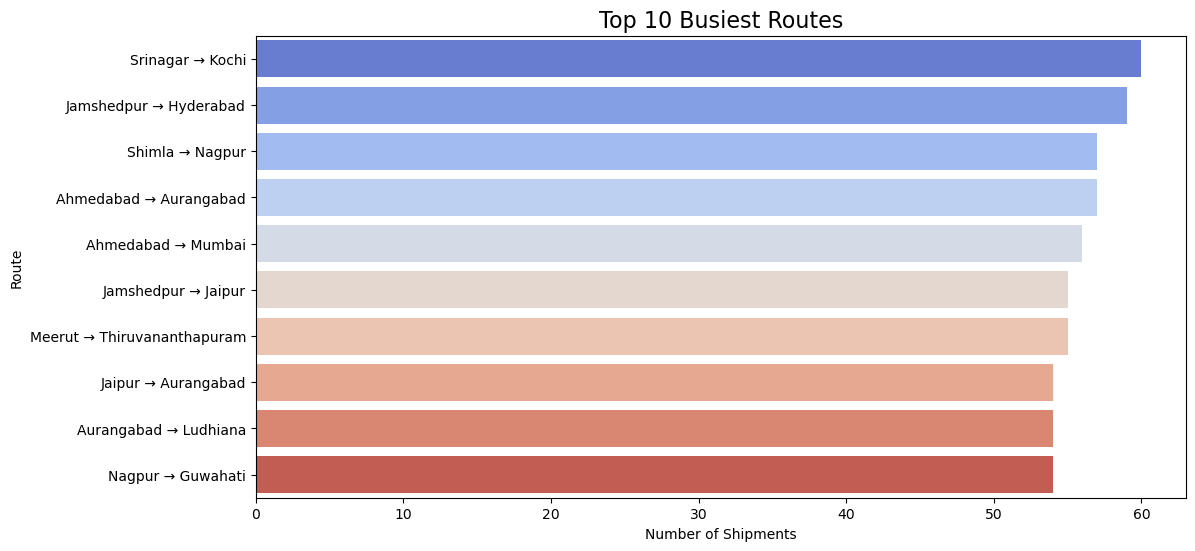

In [51]:
# Top 10 routes by number of shipments
top_busiest_routes = df['Route'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_busiest_routes.values, y=top_busiest_routes.index, palette='coolwarm')
plt.title('Top 10 Busiest Routes', fontsize=16)
plt.xlabel('Number of Shipments')
plt.ylabel('Route')
plt.show()


The provided horizontal bar chart, titled **"Top 10 Busiest Routes,"** visualizes the number of shipments for the ten most active routes. Here is a breakdown of the insights and their potential business impact.

### 1. Why was this chart chosen?  
The **horizontal bar chart** is an excellent choice for this data because it clearly displays and compares the **number of shipments** for each of the ten routes. It is especially effective for ranking data, as the longest bar corresponds to the busiest route. The horizontal format also makes it easy to read the full route names (e.g., "Srinagar → Kochi") without clutter.

### 2. Insights from the Chart  
The chart provides a clear ranking of the top 10 busiest routes based on the number of shipments:

- The route from **Srinagar → Kochi** is the busiest, with approximately **60** shipments.  
- **Jamshedpur → Hyderabad** is the second busiest route, followed closely by **Shimla → Nagpur**.  
- The busiest routes generally have between **55 and 60** shipments.  
- The routes with the fewest shipments on this top 10 list are **Nagpur → Guwahati** and **Aurangabad → Ludhiana**, both with just over **50** shipments.

### 3. Positive Business Impact  
Yes, understanding the busiest routes is crucial for a positive business impact. The insights can help a business:

- **Optimize Logistics:** Allocate more resources—such as vehicles, staff, and inventory—to the busiest routes to ensure timely deliveries and improve customer satisfaction.  
- **Prioritize Investment:** Inform decisions about where to invest in new facilities or service improvements. The busiest routes might be candidates for setting up new distribution centers to reduce transit times and costs.  
- **Enhance Operational Planning:** Use this information for better forecasting and planning. Efficient schedules and anticipation of high-demand periods can prevent delays and bottlenecks.


## 2. Typical Weight of Shipments

### We can visualize Chargeable Weight distribution to see the most common shipment sizes.

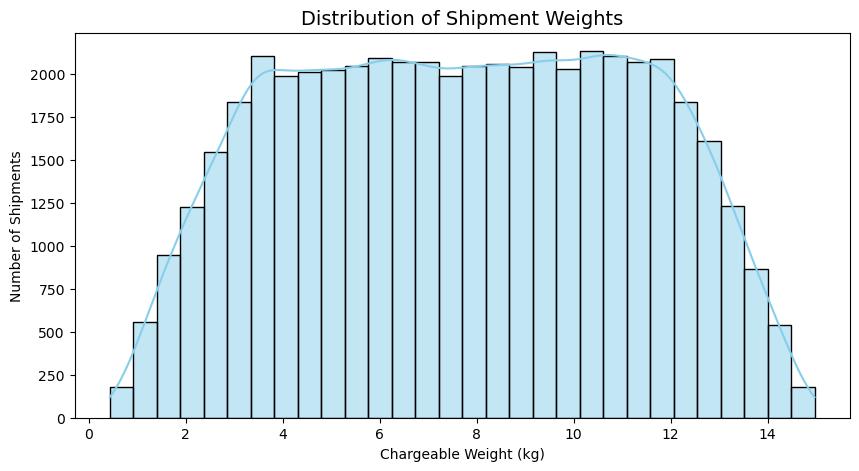

Most common shipment weight: 3.7 kg


In [52]:
plt.figure(figsize=(10,5))
sns.histplot(df['Chargeable Wt'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Shipment Weights', fontsize=14)
plt.xlabel('Chargeable Weight (kg)')
plt.ylabel('Number of Shipments')
plt.show()

# Optional: Most frequent weight
most_common_weight = df['Chargeable Wt'].mode()[0]
print(f"Most common shipment weight: {most_common_weight} kg")


### 1. Why was this chart chosen?  
A **histogram** was selected to display the **distribution of shipment weights**. This type of chart is ideal for showing the frequency of data points within continuous intervals (in this case, weight in kilograms). It helps to quickly identify the most common weight ranges and the overall pattern of the data.

### 2. Insights from the Chart  
The chart reveals several key insights about the shipment weights:

- **Most Frequent Weight Range:** The majority of shipments fall within the **4 kg to 12 kg** range, with the number of shipments generally between 2,000 and 2,100.  
- **Peak Frequency:** The distribution appears to have two peaks, around **5–7 kg** and **10–12 kg**, suggesting these are the most common shipment weights.  
- **Less Frequent Weights:** Very light (**0–3 kg**) and very heavy (**13–15 kg**) shipments occur significantly less often.  
- **Symmetry:** The distribution is somewhat symmetrical, resembling a flat-topped (platykurtic) shape, indicating a broad range of weights are almost equally common.

### 3. Positive Business Impact  
Understanding the distribution of shipment weights can help a company:

- **Optimize Packaging and Pricing:** Knowing the most common weight ranges allows for more efficient packaging and tiered pricing strategies. For example, a "standard" package size and price could be set for the **4–12 kg** range.  
- **Improve Inventory Management:** Anticipating shipment volumes in specific weight categories enables better inventory and warehouse space management.  
- **Enhance Logistics and Planning:** Helps select appropriate vehicles and equipment. If most shipments are **4–12 kg**, light-duty vehicles may suffice, reducing fuel and operational costs.


## 3. Consignment Type Analysis
### a) Overall Percentage of Documents vs Non-Documents

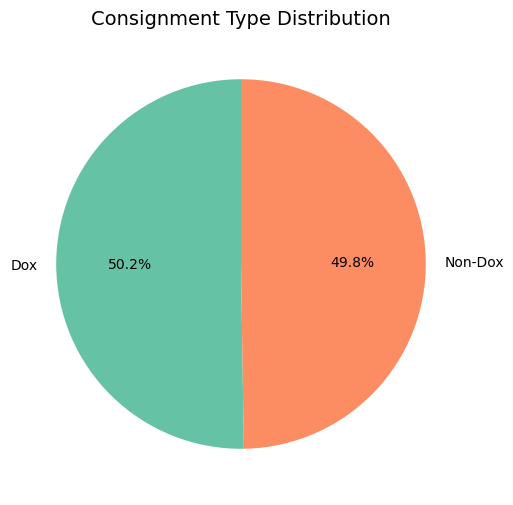

In [53]:
consignment_counts = df['Nature of Consignment'].value_counts()
plt.figure(figsize=(6,6))
consignment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Consignment Type Distribution', fontsize=14)
plt.ylabel('')
plt.show()


### 1. Why was this chart chosen?  
A **pie chart** is ideal for showing how a whole is divided into parts. In this case, it clearly shows the **proportions** of Dox and Non-Dox consignments. It's a simple, visual way to see the near 50-50 split.

### 2. Insights from the Chart  
The chart shows a very balanced mix of shipments:

- **Dox** consignments make up **50.2%** of the total.  
- **Non-Dox** consignments account for **49.8%** of the total.

### 3. Positive Business Impact  
Yes, these insights are very useful. A business can:

- **Balance Resources:** Since the consignment types are nearly equal, the company can allocate staff and resources evenly to handle both Dox and Non-Dox shipments without prioritizing one over the other.  
- **Streamline Operations:** The data confirms that the business needs to maintain equally efficient processes for both types of shipments.


### b) Consignment Type by Route (Top 5 Busiest Routes)

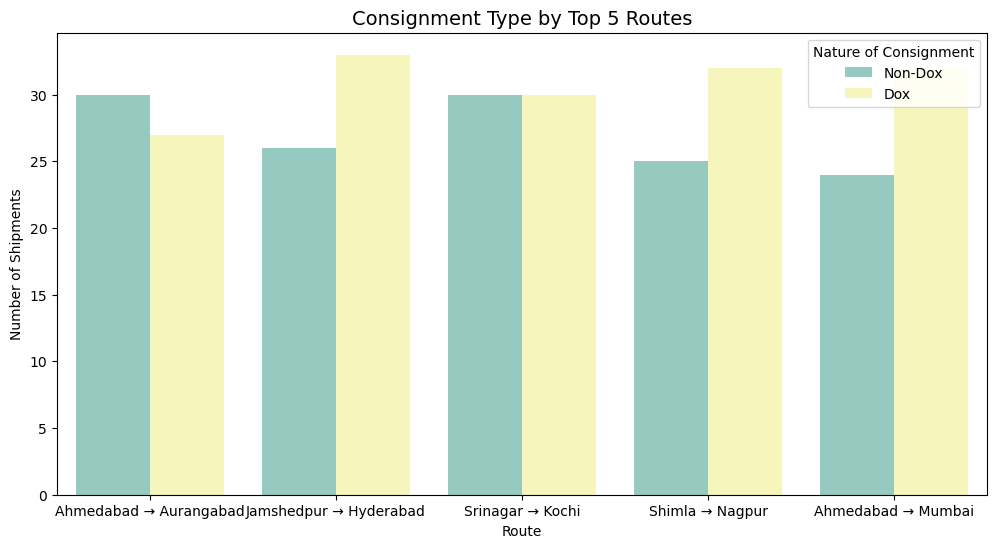

In [54]:
top_routes = df['Route'].value_counts().head(5).index
route_consignment = df[df['Route'].isin(top_routes)]

plt.figure(figsize=(12,6))
sns.countplot(data=route_consignment, x='Route', hue='Nature of Consignment', palette='Set3')
plt.title('Consignment Type by Top 5 Routes', fontsize=14)
plt.ylabel('Number of Shipments')
plt.show()


### 1. Why was this chart chosen?  
A **grouped bar chart** is an effective way to compare different categories (**Dox vs. Non-Dox**) across multiple sub-categories (the top 5 routes). It allows for a clear visualization of the consignment mix for each route and makes it easy to compare between routes.

### 2. Insights from the Chart  
The chart shows that the consignment mix varies by route:

- On the **Jamshedpur → Hyderabad**, **Shimla → Nagpur**, and **Ahmedabad → Mumbai** routes, **Dox shipments are more common** than Non-Dox.  
- The **Srinagar → Kochi** and **Ahmedabad → Aurangabad** routes have a near-even split between Dox and Non-Dox shipments.  
- Overall, the number of shipments per type on these top 5 routes is consistently between **25 and 35**.

### 3. Positive Business Impact  
Yes, this data is very useful. A business can:

- **Optimize Resources:** By knowing the dominant consignment type on each route, the business can assign the right vehicles and personnel. For example, a route with many Dox shipments might need more specialized handling.  
- **Improve Service:** Understanding the mix helps with service planning and ensures that the right supplies and resources are available for each type of consignment.


# 3. Customer and Market Insights 📈

## 1. Hotspot Areas (Top Sending and Receiving Pincodes)

### a) Top Sender Pincodes

C:\Users\USER\AppData\Local\Temp\ipykernel_37128\2733651119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sender_pincodes.index, y=top_sender_pincodes.values, palette='Blues_r')


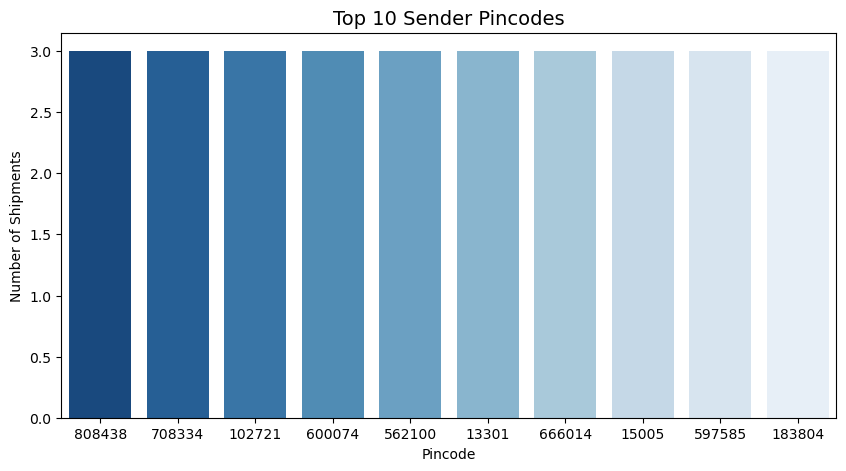

In [55]:
top_sender_pincodes = df['Sender Pincode'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_sender_pincodes.index, y=top_sender_pincodes.values, palette='Blues_r')
plt.title('Top 10 Sender Pincodes', fontsize=14)
plt.xlabel('Pincode')
plt.ylabel('Number of Shipments')
plt.show()


### b) Top Receiver Pincodes

C:\Users\USER\AppData\Local\Temp\ipykernel_37128\523867201.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_receiver_pincodes.index, y=top_receiver_pincodes.values, palette='Greens_r')


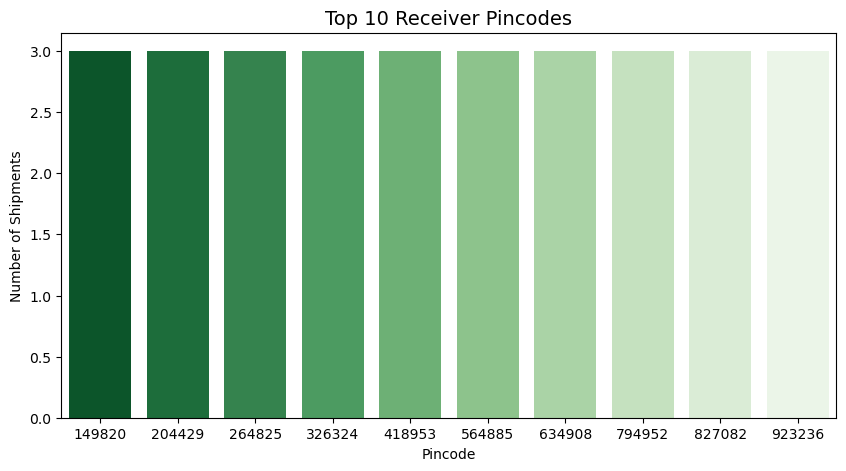

In [56]:
top_receiver_pincodes = df['Receiver Pincode'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_receiver_pincodes.index, y=top_receiver_pincodes.values, palette='Greens_r')
plt.title('Top 10 Receiver Pincodes', fontsize=14)
plt.xlabel('Pincode')
plt.ylabel('Number of Shipments')
plt.show()


### 1. Why were these charts chosen?  
**Bar charts** were chosen because they make it easy to **rank and compare** the number of shipments by location. By separating the data into two charts (one for senders and one for receivers), it provides a complete picture of the busiest origins and destinations.

### 2. Insights from the Charts  
The charts reveal a consistent pattern:

- All of the **top 10 sender pincodes** have the same number of shipments: **3**.  
- All of the **top 10 receiver pincodes** also have the same number of shipments: **3**.  
- This indicates that a wide range of locations are equally busy, rather than just a few dominant hubs.

### 3. Positive Business Impact  
Yes, these insights are valuable for business planning:

- **Optimize Logistics:** Knowing the top locations for sending and receiving allows for better allocation of resources such as staff and vehicles.  
- **Streamline Operations:** The equal distribution across many pincodes suggests the business needs a consistently reliable system that can handle a steady volume of shipments across a broad network.


## 2. Business vs Individual Customers

### Assuming the Relationship column differentiates Company vs Individual:

#### a) Number of Shipments

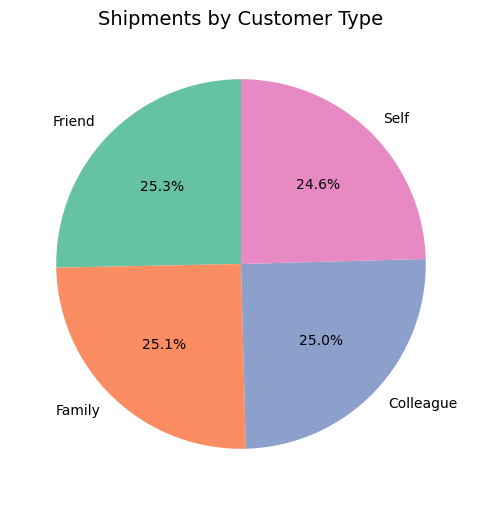

In [57]:
plt.figure(figsize=(6,6))
df['Relationship'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Shipments by Customer Type', fontsize=14)
plt.ylabel('')
plt.show()


#### b) Average Shipment Value by Customer Type

C:\Users\USER\AppData\Local\Temp\ipykernel_37128\3988783957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_value.index, y=avg_value.values, palette='viridis')


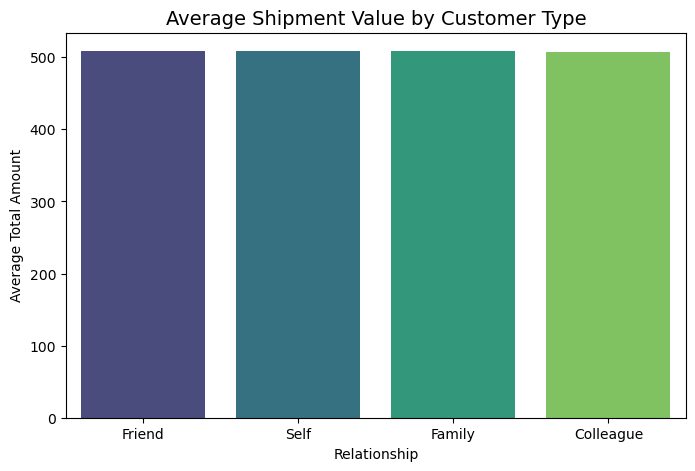

In [58]:
avg_value = df.groupby('Relationship')['Total Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_value.index, y=avg_value.values, palette='viridis')
plt.title('Average Shipment Value by Customer Type', fontsize=14)
plt.ylabel('Average Total Amount')
plt.show()


### 1. Why were these charts chosen?  
These charts were selected to give a **complete view of customer data**.  

- The **pie chart** is ideal for showing how a whole (all shipments) is divided into parts.  
- The **bar chart** is perfect for comparing the average value of shipments across each customer group.  

Together, they offer a simple and comprehensive analysis.

### 2. Insights from the Charts  
The charts reveal a consistent insight about the customer base:

- **Balanced Customer Base:** The pie chart shows shipments are nearly equal among all four customer types—**Friend, Self, Family, and Colleague**—each making up about **25%** of total shipments.  
- **Equal Value:** The bar chart shows that the average value of a shipment is almost the same for every customer type, around **₹500**.

### 3. Positive Business Impact  
Yes, this combined insight is extremely helpful:

- **All Customers Matter Equally:** There is no single customer group that is more important than another. The business should provide **consistent, high-quality service** to all.  
- **Broad Marketing Strategy:** Marketing efforts can target all customer groups equally, instead of focusing on just one, ensuring maximum reach and engagement.


# 6. Solution to Business Objective

### Solution to Achieve Business Objectives from Shipment Data Analysis

- **Optimize Cash & Promote Digital Payments:**  
  Cash is the primary revenue source. Streamline cash-handling processes and offer incentives to encourage card and wallet payments. This reduces operational costs and diversifies payment options.

- **Invest in Profitable Routes:**  
  Focus resources on high-revenue routes like **Srinagar → Kochi** and **Jamshedpur → Hyderabad** to maintain service quality and drive further growth.

- **Ensure Consistent Pricing:**  
  Use the strong positive correlation between shipment weight and price to audit pricing. This helps maintain pricing integrity and improve profitability.

- **Develop Flexible Logistics:**  
  Design a logistics system that can efficiently handle both the high volume of a few busy routes and the equally distributed activity across many different pincodes.

- **Maintain Broad Customer Strategy:**  
  Since all customer types contribute equally to shipment volume and value, continue with a broad marketing and service strategy that appeals to everyone.

---

### Conclusion

- Cash is the top revenue generator, but digital payments are underutilized.  
- The most profitable routes are critical to the business's success.  
- There is a strong link between shipment weight and price.  
- All customer types contribute equally to both shipment volume and value.  
- Logistics must be optimized for both concentrated and distributed activity.
